In [1]:
import matplotlib.pyplot as plt

plt.rcParams["figure.constrained_layout.use"] = True
plt.rcParams["scatter.edgecolors"] = "black"
plt.rcParams["lines.linewidth"] = 0.25

import seaborn as sns

sns.set()
sns.set_theme(style="whitegrid")
sns.set_context("notebook")
sns.set_palette("PuBu")

import numpy as np

from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap
from sklearn.decomposition import PCA


# MDS


/var/folders/37/qm04wzz922lbp9wmkw415w100000gn/T/ipykernel_37914/3672958240.py:4: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
/var/folders/37/qm04wzz922lbp9wmkw415w100000gn/T/ipykernel_37914/3672958240.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap("rainbow", 5))


(-0.09861900528225165,
 4.151194683004887,
 0.16376276645924268,
 1.0373822393030123)

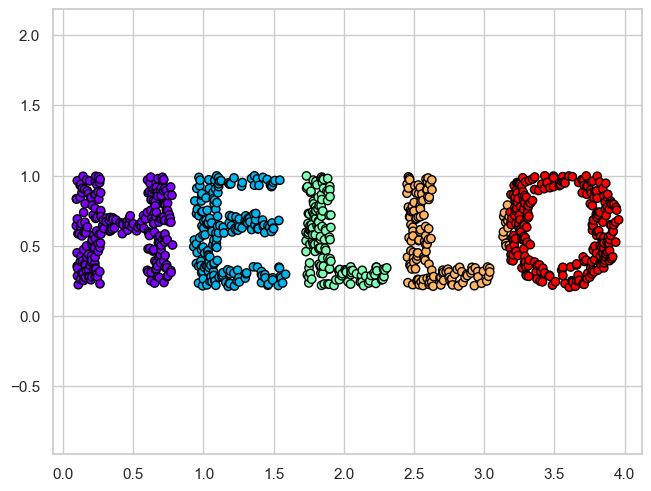

In [2]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis("off")
    ax.text(0.5, 0.4, "HELLO", va="center", ha="center", weight="bold", size=85)
    fig.savefig("hello.png")
    plt.close(fig)

    # Open this PNG and draw random points from it
    from matplotlib.image import imread

    data = imread("hello.png")[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = data[i, j] < 1
    X = X[mask]
    X[:, 0] *= data.shape[0] / data.shape[1]
    X = X[:N]
    return X[np.argsort(X[:, 0])]


X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap("rainbow", 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis("equal")


(4.577541820891496, 8.72455626221733, 5.146115009225374, 7.335997084293606)

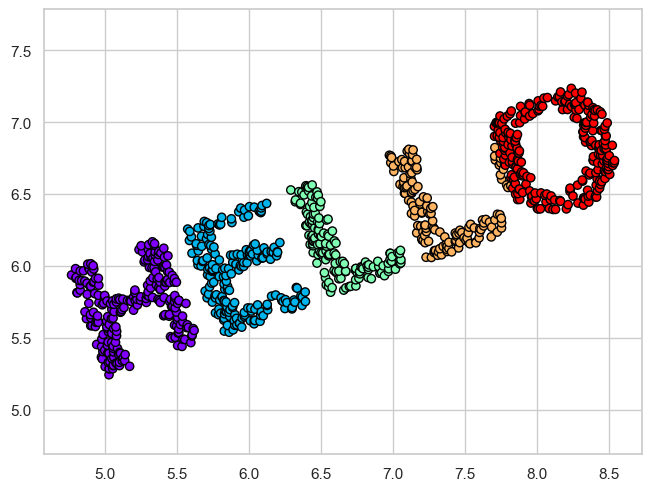

In [3]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)


X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis("equal")


In [4]:
D = pairwise_distances(X)
D.shape


(1000, 1000)

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kwargs)>

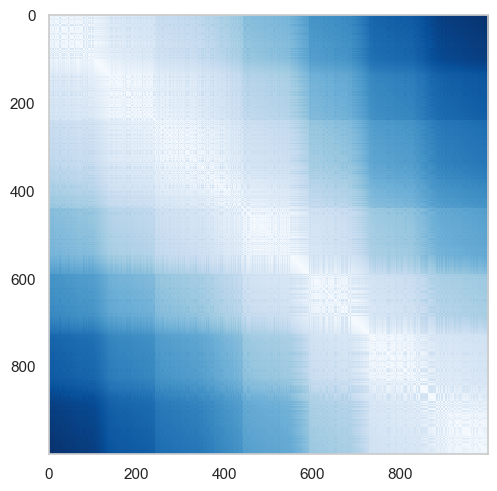

In [5]:
plt.imshow(D, zorder=2, cmap="Blues", interpolation="nearest")
plt.colorbar


## Linear Embedding


/Users/vajk/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-2.0573347948248064,
 2.0421813558695217,
 -1.1477429811264606,
 1.2049382775465705)

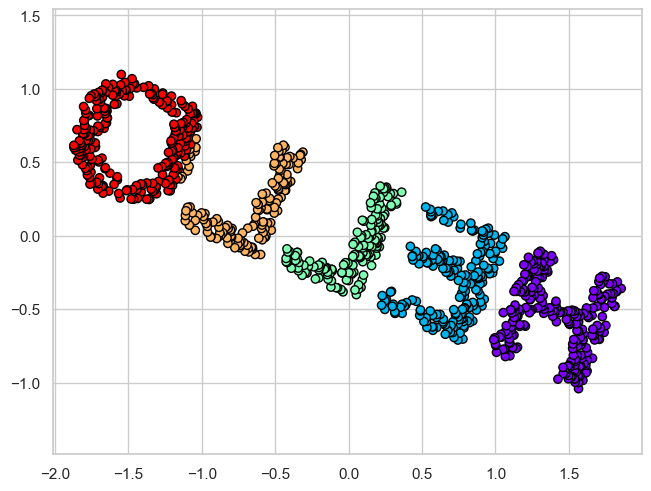

In [6]:
model = MDS(n_components=2, dissimilarity="precomputed", random_state=33, n_jobs=-1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis("equal")


This distance matrix gives us a representation of our data that is invariant to rotations and translations, but the visualization of the matrix above is not entirely intuitive.
In the representation shown in this figure, we have lost any visible sign of the interesting structure in the data: the "HELLO" that we saw before.

Further, while computing this distance matrix from the (x, y) coordinates is straightforward, transforming the distances back into _x_ and _y_ coordinates is rather difficult.
This is exactly what the multidimensional scaling algorithm aims to do: given a distance matrix between points, it recovers a $D$-dimensional coordinate representation of the data.
The MDS algorithm recovers one of the possible two-dimensional coordinate representations of our data, using _only_ the $N\times N$ distance matrix describing the relationship between the data points.


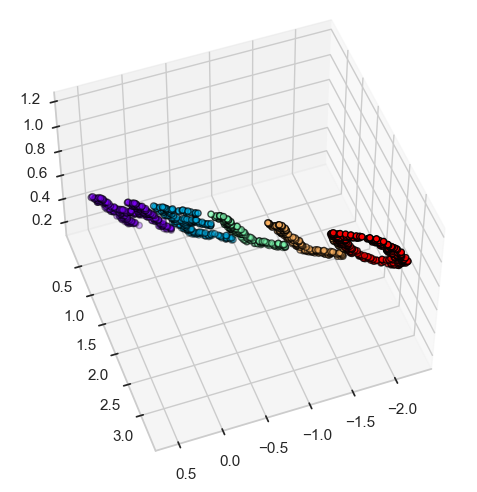

In [7]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[: X.shape[1]])


X3 = random_projection(X, 3)
X3.shape

# from mpl_tookits import mplot3d
ax = plt.figure().add_subplot(projection="3d")
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim=70, elev=50)


/Users/vajk/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


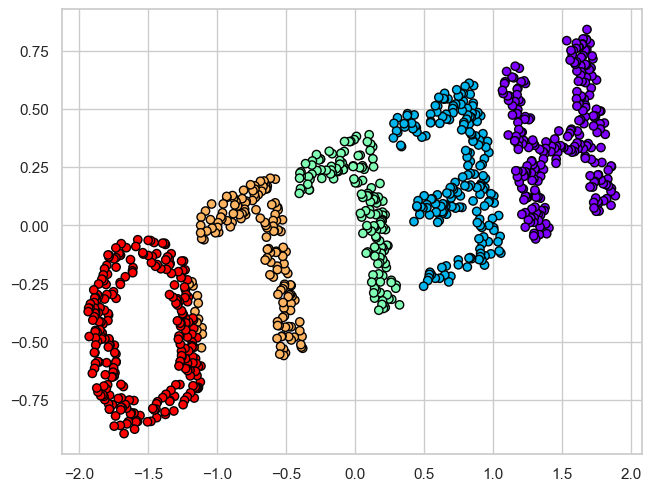

In [8]:
model = MDS(n_components=2, random_state=7, n_jobs=-1)
out = model.fit_transform(X3)
plt.scatter(out[:, 0], out[:, 1], **colorize)


## Nonlinear Embedding


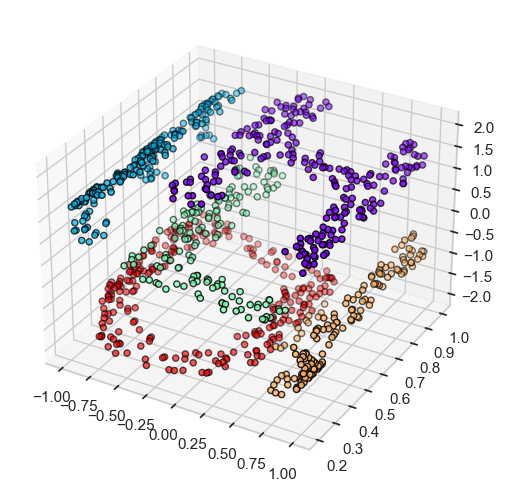

In [9]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T


XS = make_hello_s_curve(X)

ax = plt.figure().add_subplot(projection="3d")
ax.scatter(XS[:, 0], XS[:, 1], XS[:, 2], **colorize)


/Users/vajk/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-1.3060553156377535,
 1.163443866168215,
 -2.3568605451829927,
 2.1817544296866993)

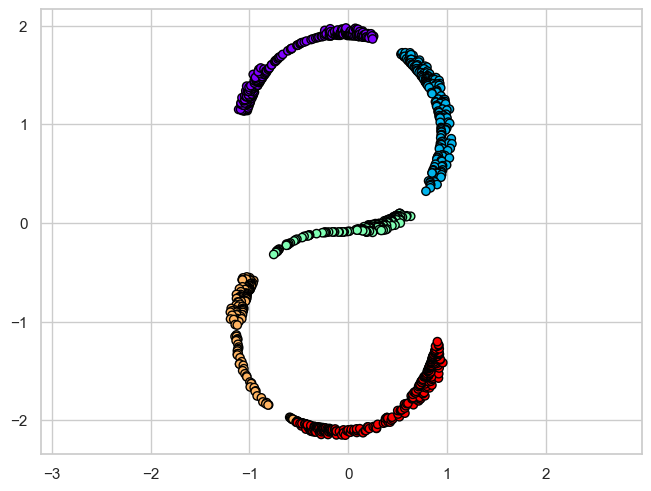

In [10]:
model = MDS(n_components=2, random_state=7, n_jobs=-1)
out = model.fit_transform(XS)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis("equal")


# LLE


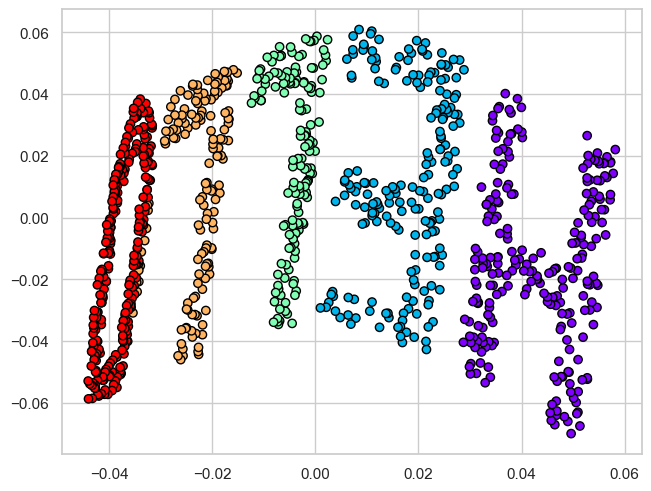

In [11]:
model = LocallyLinearEmbedding(
    n_neighbors=100,
    n_components=2,
    random_state=7,
    n_jobs=-1,
    method="modified",
    eigen_solver="dense",
)

out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)


# Isomap


In [12]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(1806, 2914)

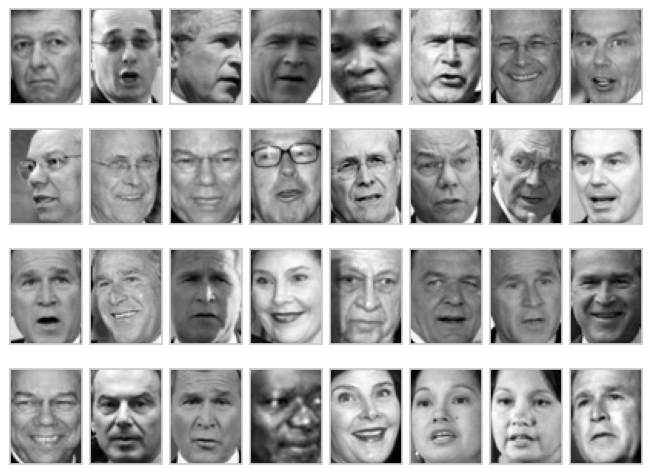

In [13]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="gray")

In [14]:
model = PCA(svd_solver="randomized", random_state=53).fit(faces.data)

Text(90, 1, '0.8999999761581421% at the 96-th PC')

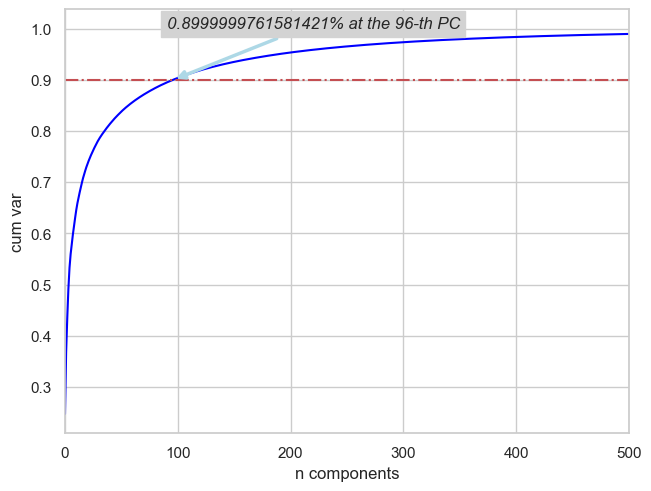

In [15]:
expl_var = np.cumsum(model.explained_variance_ratio_)

expl_90 = np.where(expl_var <= 0.9)[-1][-1] + 1

fig, ax = plt.subplots()
ax.plot(np.cumsum(model.explained_variance_ratio_), c="blue")
ax.set(xlabel="n components", ylabel="cum var", xlim=(0, 500))
ax.plot([0, 500], [0.9, 0.9], c="r", ls="-.")
ax.annotate(
    text=f"{expl_var[expl_90].round(3)}% at the {expl_90}-th PC",
    xy=(expl_90, 0.9),
    xytext=(90, 1),
    arrowprops=dict(arrowstyle="-|>", color="lightblue", linewidth=2.5),
    backgroundcolor="lightgray",
    fontsize="medium",
    fontstyle="oblique",
)


We see that for this data, nearly 100 components are required to preserve 90% of the variance: this tells us that the data is intrinsically very high dimensional—it can't be described linearly with just a few components.

When this is the case, nonlinear manifold embeddings like LLE and Isomap can be helpful.
We can compute an Isomap embedding on these faces using the same pattern shown before:


In [16]:
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape


(1806, 2)

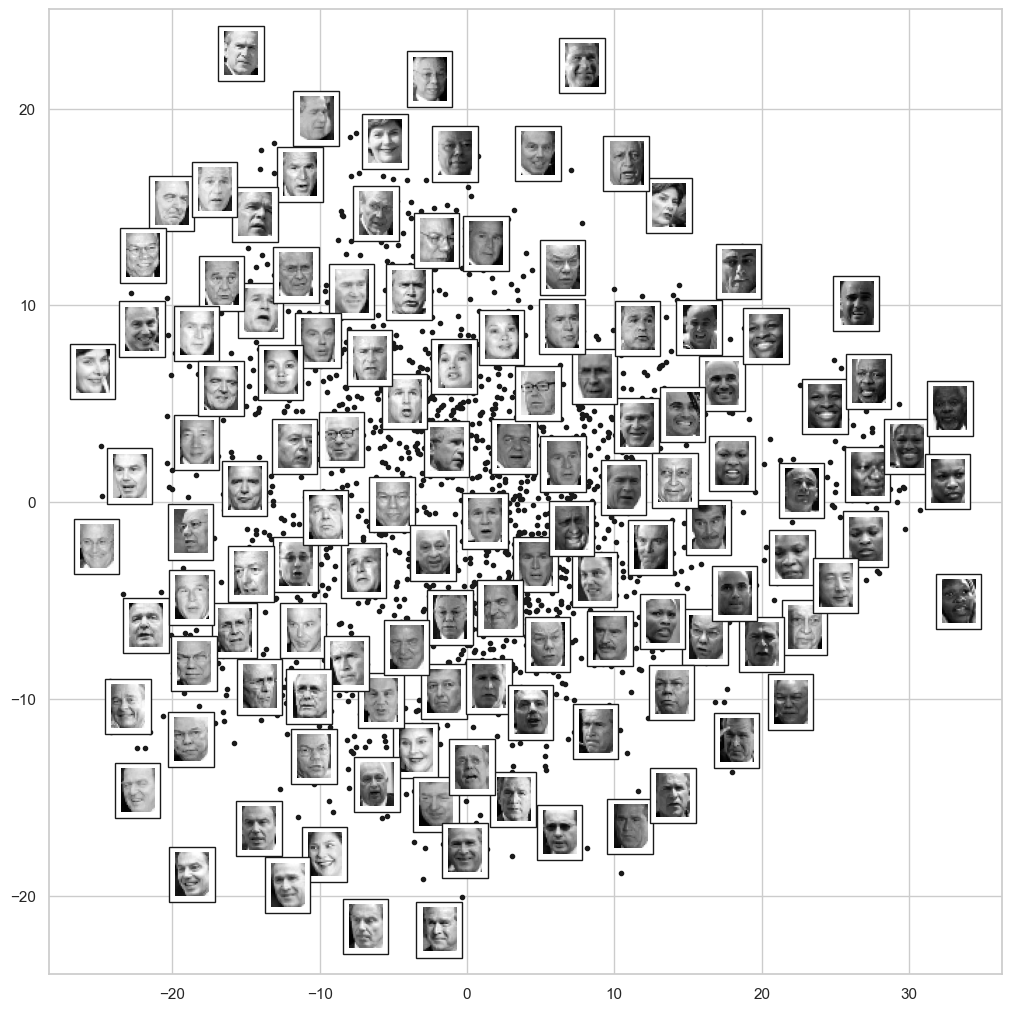

In [17]:
from matplotlib import offsetbox


def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap="gray"):
    ax = ax or plt.gca()

    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], ".k")

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap), proj[i]
            )
            ax.add_artist(imagebox)


fig, ax = plt.subplots(figsize=(10, 10))
plot_components(
    faces.data, model=Isomap(n_components=2), images=faces.images[:, ::2, ::2]
)
